In [291]:
import pandas as pd


In [292]:
dataset = pd.read_csv("insurance_pre.csv")

In [293]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [294]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [295]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [296]:
input = dataset[['age', 'sex_male', 'bmi','smoker_yes','children']]

In [297]:
input

,age,sex_male,bmi,smoker_yes,children
0,19,0,27.900,1,0
1,18,1,33.770,0,1
2,28,1,33.000,0,3
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,0,3
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [298]:
output=dataset[['charges']]

In [299]:
output

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [300]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(input,output,test_size=0.30,random_state=0)

In [301]:
x_train

,age,sex_male,bmi,smoker_yes,children
1163,18,0,28.215,0,0
196,39,0,32.800,0,0
438,52,0,46.750,0,5
183,44,0,26.410,0,0
1298,33,1,27.455,0,2
...,...,...,...,...,...
763,27,1,26.030,0,0
835,42,1,35.970,0,2
1216,40,1,25.080,0,0
559,19,1,35.530,0,0


In [302]:
y_train

,charges
1163,2200.83085
196,5649.71500
438,12592.53450
183,7419.47790
1298,5261.46945
...,...
763,3070.80870
835,7160.33030
1216,5415.66120
559,1646.42970


In [303]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='poisson', splitter='best',min_samples_leaf=0.1,min_samples_split=0.2)
regressor=regressor.fit(x_train,y_train)

In [304]:
regressor

DecisionTreeRegressor(criterion='poisson', min_samples_leaf=0.1,
                      min_samples_split=0.2)

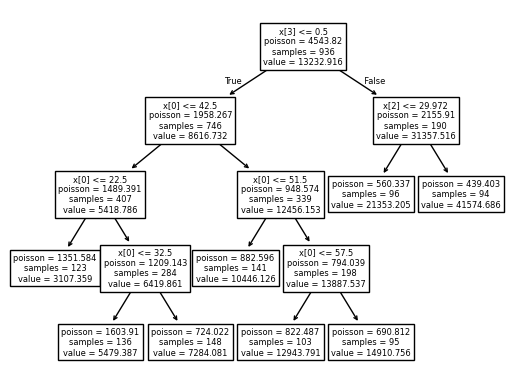

In [305]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [306]:
y_pred=regressor.predict(x_test)

In [307]:
from sklearn.metrics import r2_score
r_score = r2_score(y_test,y_pred)

In [308]:
r_score

0.8676683461871467